In [1]:
import pandas as pd
import numpy as np
from pycaret.classification  import *
from fast_ml import eda
from sys import path
import os
path.append(os.path.abspath(os.path.join('..')))

In [2]:
df = pd.read_parquet('../data/selected_data.parquet')

In [3]:
df.columns

Index(['Vmag', 'RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE', 'DE:RA', 'BTmag',
       'VTmag', 'B-V', 'V-I', 'Hpmag', '(V-I)red', 'd', 'T', 'M_v', 'M_Hip',
       'Tipo_espectral'],
      dtype='object')

In [4]:
eda.df_info(df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Vmag,float32,Numerical,1113,"[8.130000114440918, 8.460000038146973, 8.85000...",0,0.0
RAdeg,float64,Numerical,107549,"[38.20592381, 38.33578505, 168.61947293000003,...",0,0.0
DEdeg,float64,Numerical,107549,"[61.37836045, 61.52172056, -61.34420395357142,...",0,0.0
Plx,float64,Numerical,5139,"[1.47, 2.13, 10.989999999999998, 2.33, 1.85, 2...",0,0.0
pmRA,float64,Numerical,24677,"[-2.34, -0.08, -65.70214285714286, -30.82, -7....",0,0.0
pmDE,float64,Numerical,22323,"[-0.72, -2.36, -6.615714285714286, 16.77, -2.5...",0,0.0
DE:RA,float64,Numerical,412,"[-0.2, -0.17, 0.14214285714285715, -0.07, -0.0...",0,0.0
BTmag,float64,Numerical,10589,"[8.91, 8.875, 9.1995, 1.957, 7.914, 9.66307142...",0,0.0
VTmag,float64,Numerical,9818,"[8.223, 8.493, 8.393071428571428, 2.189, 7.589...",0,0.0
B-V,float32,Numerical,3167,"[0.6349999904632568, 0.3619999885559082, 0.953...",0,0.0


In [5]:
#Removemos los valores nan de la columna Transported(es la columna objetivo, pycaret necesita los datos limpios, sirva esto como un ejemplo para pycaret no de tratamiendo)
df = df.dropna(subset=['Tipo_espectral']) 

In [6]:
#aplicamos un encoder a nuestro dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df:
    df['Tipo_espectral'] = le.fit_transform(df['Tipo_espectral'])


In [7]:
#Creamos nuestro setup con la columna objetivo
setup = setup(df, target='Tipo_espectral', session_id=357, preprocess=False, train_size=0.8)

,Description,Value
0,Session id,357
1,Target,Tipo_espectral
2,Target type,Multiclass
3,Original data shape,"(104783, 18)"
4,Transformed data shape,"(104783, 18)"
5,Transformed train set shape,"(83826, 18)"
6,Transformed test set shape,"(20957, 18)"
7,Numeric features,17


In [8]:
#Creamos una evaluación rápida de modelos
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:30:59
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [9]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


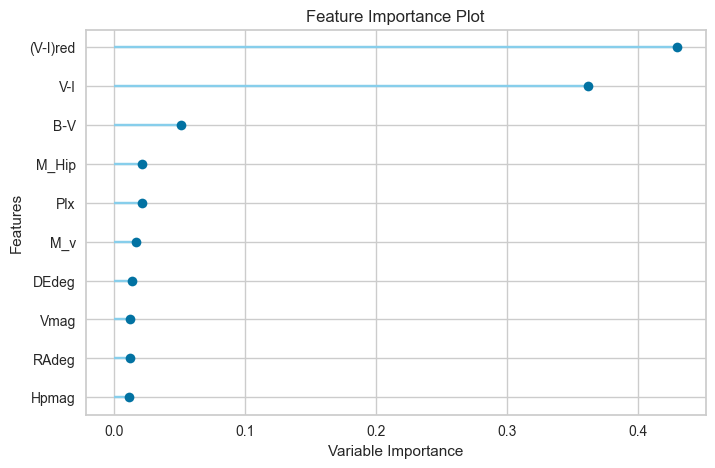

In [10]:
# plot feature importance
plot_model(best, plot = 'feature' )

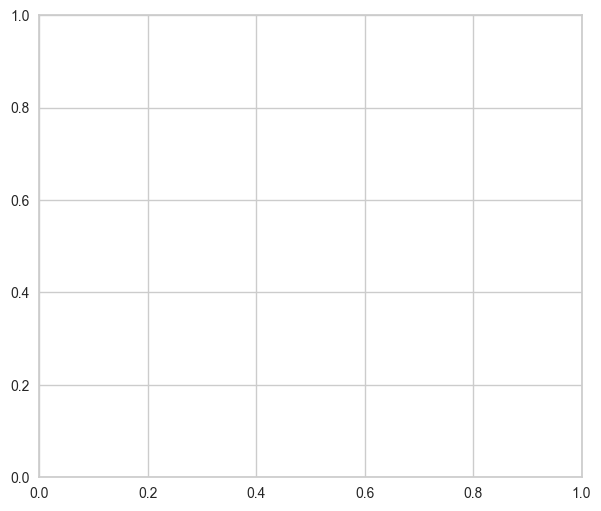

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
evaluate_model(best) #otra manera 

In [12]:
# predicción modelo
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8325,0.9742,0.8325,0.8306,0.8312,0.7878,0.7879


In [13]:
# vemos las predicciones
holdout_pred.head()

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip,Tipo_espectral,prediction_label,prediction_score
19804,7.07,327.973846,-54.652107,5.39,38.360001,-46.900002,0.16,7.218,7.082,0.123,0.14,7.1176,0.10,185.528763,8643.724609,0.727944,0.775544,0,0,0.9963
12451,8.31,1.222163,-30.256613,3.15,17.660000,3.820000,0.02,8.350,8.299,0.036,0.05,8.3279,0.05,317.460327,9478.357422,0.801553,0.819452,0,0,0.9575
94757,8.12,104.650162,-26.713713,1.64,-0.390000,14.850000,0.03,10.201,8.275,1.599,1.62,8.2372,1.52,609.756104,3465.909180,-0.805781,-0.688581,4,4,0.9739
31353,8.72,70.477577,-44.915962,6.72,-12.960000,10.930000,-0.05,9.119,8.763,0.362,0.42,8.8014,0.42,148.809525,6960.065430,2.856847,2.938246,2,2,0.8916
91394,6.96,200.061234,3.287553,8.89,5.350000,-8.320000,-0.31,8.445,7.090,1.148,1.11,7.1310,1.08,112.485939,4242.424316,1.704509,1.875509,4,4,0.9677


In [14]:
# Hago una copia de los datos y elimino la variable objetivo
new_data = df.copy()
new_data.drop('Tipo_espectral', axis=1, inplace=True)
new_data.head()

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip
0,8.13,38.205924,61.378360,1.47,-2.340000,-0.720000,-0.200000,8.9100,8.223000,0.635,0.70,8.2639,0.66,680.272095,5693.333496,-1.033413,-0.899513
1,8.46,38.335785,61.521721,2.13,-0.080000,-2.360000,-0.170000,8.8750,8.493000,0.362,0.42,8.5436,0.41,469.483582,6960.065430,0.101898,0.185498
2,8.85,168.619473,-61.344204,10.99,-65.702143,-6.615714,0.142143,9.1995,8.393071,0.954,0.94,9.0175,0.94,90.991814,4694.887207,4.054989,4.222488
3,2.21,120.896126,-40.003188,2.33,-30.820000,16.770000,-0.070000,1.9570,2.189000,-0.269,-0.22,2.1364,-0.22,429.184540,14328.858398,-5.953221,-6.026821
4,7.55,303.138025,40.268185,1.85,-7.760000,-2.540000,-0.040000,7.9140,7.589000,0.309,0.35,7.6252,0.47,540.540527,7274.275879,-1.114141,-1.038942


In [15]:
# Pruebo mi modelo de predicción con el nuevo dataset guardado como new_data #estan vacios ya que el resultado se guardo en "predictions"
predictions = predict_model(best, data = new_data)
predictions.head()

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip,prediction_label,prediction_score
0,8.13,38.205925,61.378361,1.47,-2.340000,-0.720000,-0.200000,8.9100,8.223000,0.635,0.70,8.2639,0.66,680.272095,5693.333496,-1.033413,-0.899513,1,0.7446
1,8.46,38.335785,61.521721,2.13,-0.080000,-2.360000,-0.170000,8.8750,8.493000,0.362,0.42,8.5436,0.41,469.483582,6960.065430,0.101898,0.185498,6,0.8119
2,8.85,168.619476,-61.344204,10.99,-65.702141,-6.615714,0.142143,9.1995,8.393071,0.954,0.94,9.0175,0.94,90.991814,4694.887207,4.054989,4.222488,6,0.7228
3,2.21,120.896126,-40.003189,2.33,-30.820000,16.770000,-0.070000,1.9570,2.189000,-0.269,-0.22,2.1364,-0.22,429.184540,14328.858398,-5.953221,-6.026821,6,0.9019
4,7.55,303.138031,40.268185,1.85,-7.760000,-2.540000,-0.040000,7.9140,7.589000,0.309,0.35,7.6252,0.47,540.540527,7274.275879,-1.114141,-1.038942,6,0.8265


In [16]:
#finalizado el modelo 
finalize_model(best)

Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsample_byn...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))],
         verbose=False)

In [17]:
# #guardo el modelo
save_model(best, 'hyp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  XGBClassifier(base_score=None, booster='gbtree',
                                callbacks=None, colsample_bylevel=None,
                                colsample_bynode...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monot

In [18]:
#cargo el modelo
loaded_best_pipeline = load_model('hyp')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))],
         verbose=False)